# Breast Cancer Classification

##  Importing libraries

In [50]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
cd /content/drive/MyDrive/cancer classification/breast cancer

/content/drive/.shortcut-targets-by-id/1FTi9I7XZ7sbmMn4glRPu2WAxfIyQLwRZ/cancer classification/breast cancer


## Load the data

In [53]:
df = pd.read_csv('breast.csv')

In [54]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Preprocessing

In [55]:
df.drop(['id'], axis = 1, inplace = True)

In [56]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [57]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [58]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [61]:
# checking for null values

df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


#### There are no missing values in the data.

## Correlations between features.

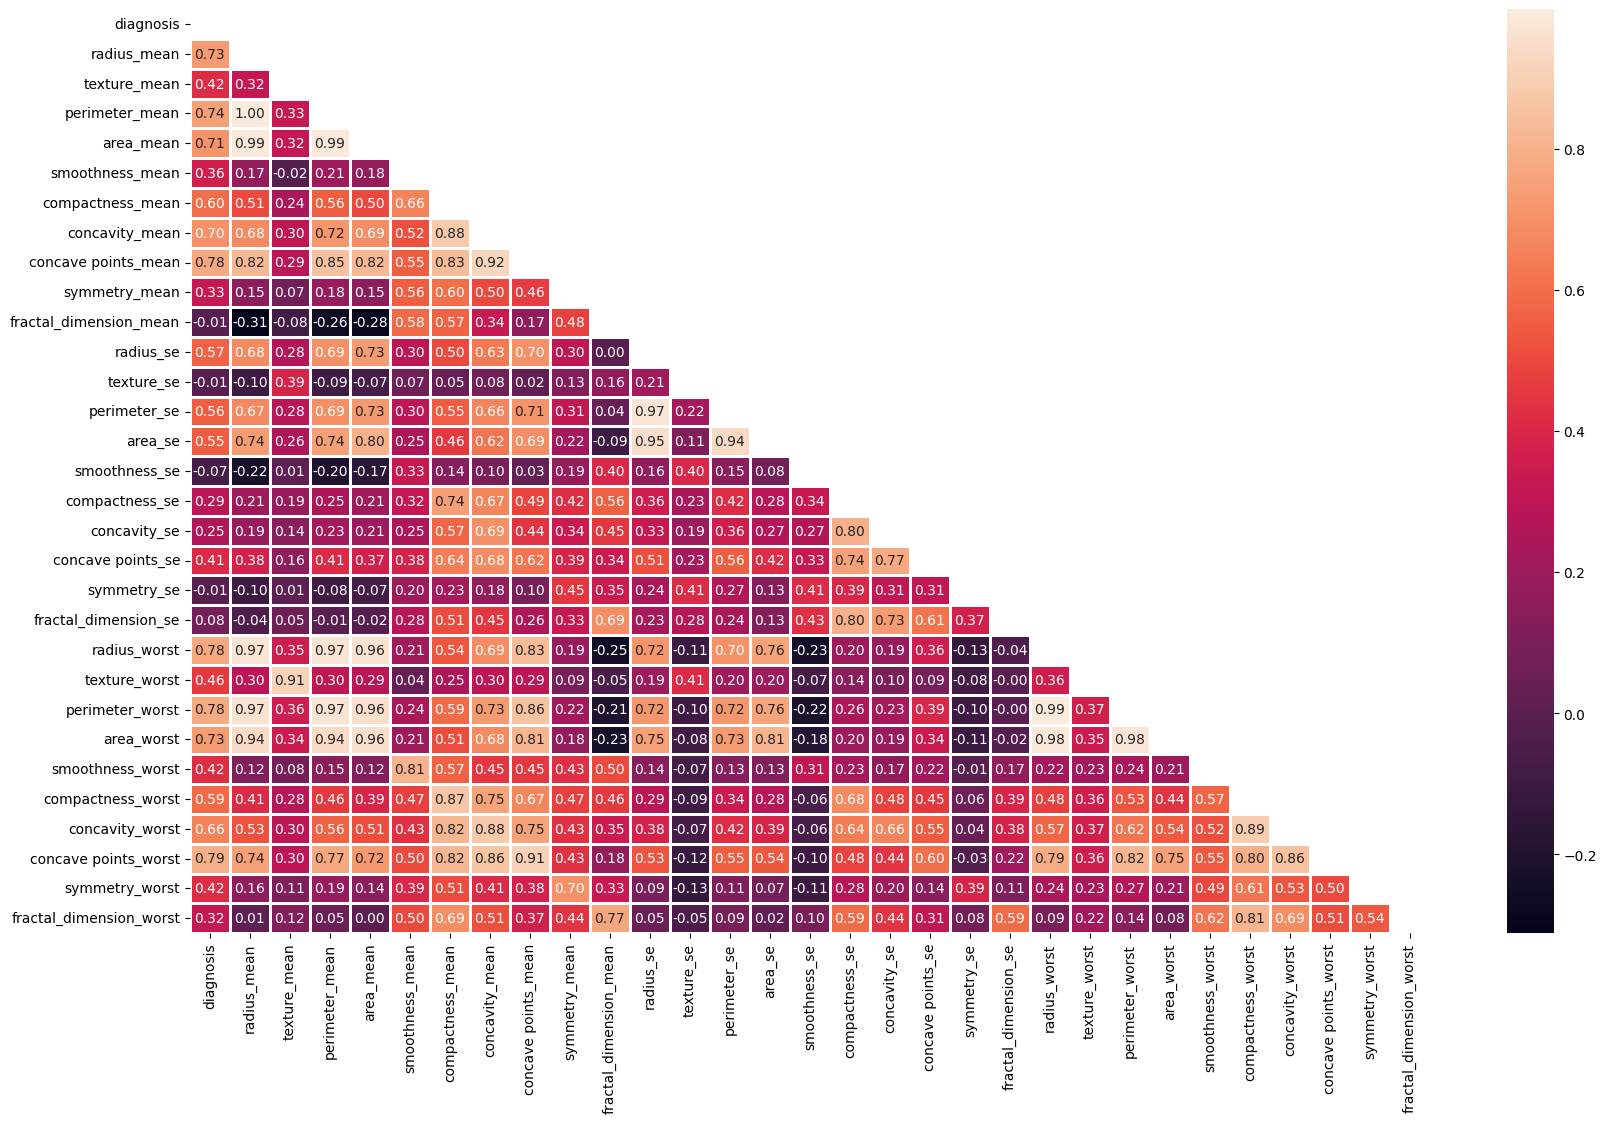

In [62]:
# heatmap

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [63]:
df.diagnosis.value_counts()

,count
diagnosis,
0,357
1,212


In [64]:
class_names = ["Benign", "Malignant"]

In [65]:
# creating features and label

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [66]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [68]:
# prompt: need to know how many instances per every class in X_train with y_train

import pandas as pd
import numpy as np
from collections import Counter

# Combine X_train and y_train into a single DataFrame
df_combined = pd.DataFrame(np.hstack((X_train, np.reshape(y_train, (-1, 1)))), columns=list(df.drop('diagnosis', axis=1).columns) + ['diagnosis'])

# Count the number of instances per class
class_counts = Counter(df_combined['diagnosis'])

# Print the class counts
print(class_counts)


Counter({0.0: 288, 1.0: 167})


In [69]:
#Random data shuffle
from imblearn.over_sampling import RandomOverSampler
#X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [70]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [71]:
# Combine X_train and y_train into a single DataFrame
df_combined = pd.DataFrame(np.hstack((X_train, np.reshape(y_train, (-1, 1)))), columns=list(df.drop('diagnosis', axis=1).columns) + ['diagnosis'])

# Count the number of instances per class
class_counts = Counter(df_combined['diagnosis'])

# Print the class counts
print(class_counts)

Counter({0.0: 288, 1.0: 167})


# Support Vector Classifier (SVC)

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_searchSVC = GridSearchCV(svc, parameters, cv=5)
grid_searchSVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [73]:
# best parameters

grid_searchSVC.best_params_

{'C': 10, 'gamma': 0.01}

In [74]:
# model predictions
best_svc = grid_searchSVC.best_estimator_
y_pred = best_svc.predict(X_test)

In [75]:
# accuracy score
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.9736842105263158


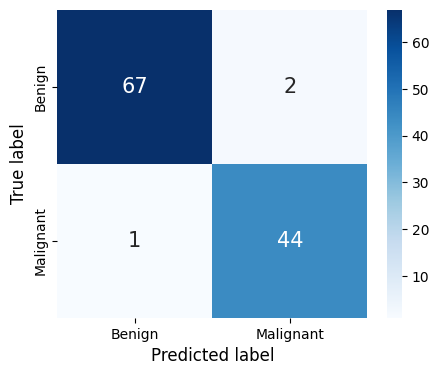

In [76]:
from sklearn import metrics
class_names = ["Benign", "Malignant"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

In [77]:
# classification report

print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

              precision    recall  f1-score   support

      Benign     0.9853    0.9710    0.9781        69
   Malignant     0.9565    0.9778    0.9670        45

    accuracy                         0.9737       114
   macro avg     0.9709    0.9744    0.9726       114
weighted avg     0.9739    0.9737    0.9737       114



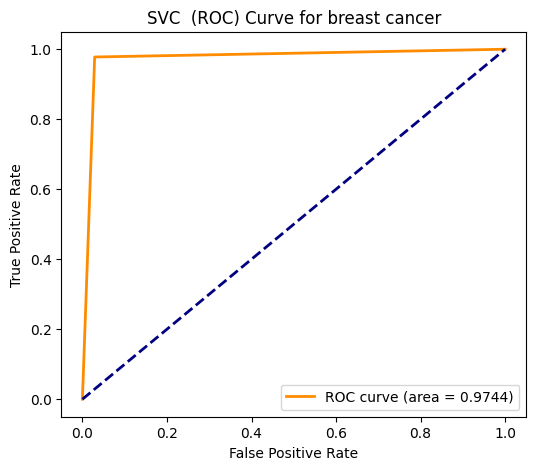

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC  (ROC) Curve for breast cancer')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 5),
    'min_samples_leaf' : range(1, 10, 3),
    'min_samples_split' : range(2, 10, 3),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [80]:
# best parameters
best_dt = grid_search_dt.best_estimator_
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 27,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [81]:
y_pred = best_dt.predict(X_test)

In [82]:
# accuracy score
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.9385964912280702


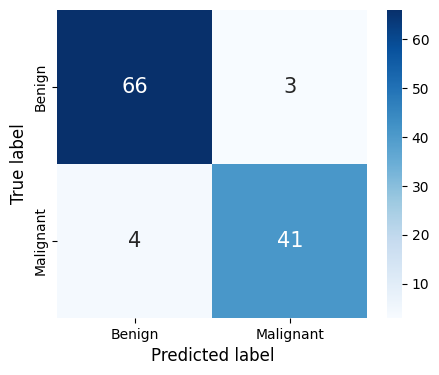

In [83]:
from sklearn import metrics
class_names = ["Benign", "Malignant"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

In [84]:
# classification report

print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

              precision    recall  f1-score   support

      Benign     0.9429    0.9565    0.9496        69
   Malignant     0.9318    0.9111    0.9213        45

    accuracy                         0.9386       114
   macro avg     0.9373    0.9338    0.9355       114
weighted avg     0.9385    0.9386    0.9385       114



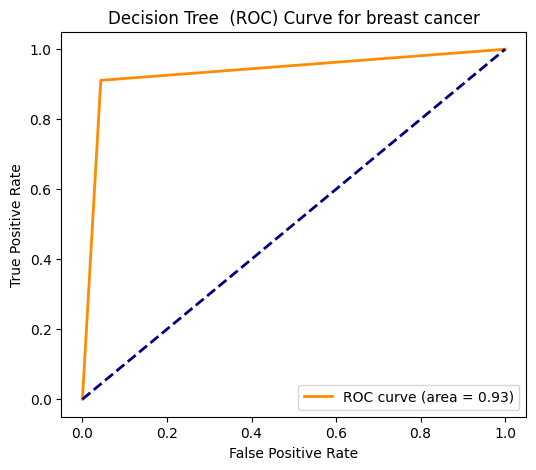

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree  (ROC) Curve for breast cancer')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],          # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 11, 12],                 # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']           # Function to measure the quality of a split
}

# Create a RandomForestClassifier instance
rand_clf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with the RandomForestClassifier, parameter grid, and cross-validation
grid_search = GridSearchCV(estimator=rand_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score=0)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Train the model with the best parameters
best_rand_clf = RandomForestClassifier(**best_params, random_state=42)
best_rand_clf.fit(X_train, y_train)

print("Best Parameters: ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [87]:
y_pred = best_rand_clf.predict(X_test)

In [88]:
# accuracy score
ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9385964912280702


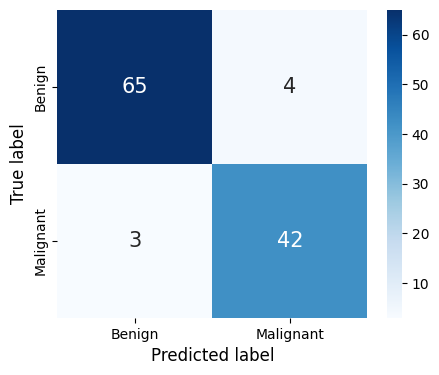

In [89]:
from sklearn import metrics
class_names = ["Benign", "Malignant"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

In [90]:
# classification report

print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

              precision    recall  f1-score   support

      Benign     0.9559    0.9420    0.9489        69
   Malignant     0.9130    0.9333    0.9231        45

    accuracy                         0.9386       114
   macro avg     0.9345    0.9377    0.9360       114
weighted avg     0.9390    0.9386    0.9387       114



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest  (ROC) Curve for breast cancer')
plt.legend(loc='lower right')
plt.show()

# Extreme Gradient Boosting

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
    'max_depth': [3, 4, 5],            # Maximum depth of the tree
    'n_estimators': [150, 180, 200]     # Number of boosting rounds
}

# Create an XGBClassifier instance
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Instantiate GridSearchCV with the XGBClassifier, parameter grid, and cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score=0)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Train the model with the best parameters
best_xgb = XGBClassifier(**best_params, objective='binary:logistic', random_state=42)
best_xgb.fit(X_train, y_train)


print("Best Parameters: ", best_params)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [93]:
y_pred = best_xgb.predict(X_test)

In [94]:
# accuracy score
xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9385964912280702


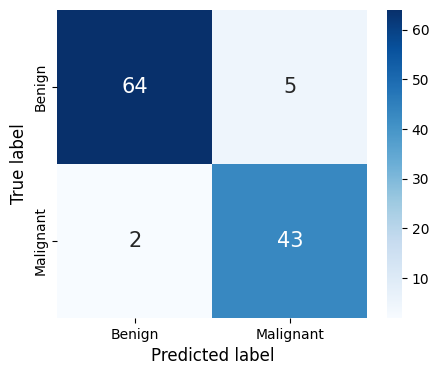

In [95]:
from sklearn import metrics
class_names = ["Benign", "Malignant"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

In [96]:
# classification report

print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

              precision    recall  f1-score   support

      Benign     0.9697    0.9275    0.9481        69
   Malignant     0.8958    0.9556    0.9247        45

    accuracy                         0.9386       114
   macro avg     0.9328    0.9415    0.9364       114
weighted avg     0.9405    0.9386    0.9389       114



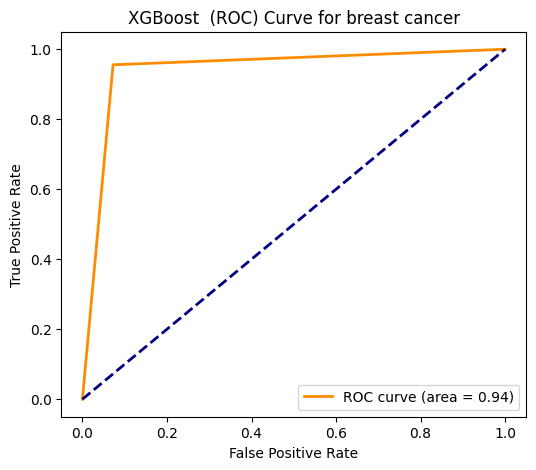

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost  (ROC) Curve for breast cancer')
plt.legend(loc='lower right')
plt.show()

## Comparison

## with balancing

In [49]:
models = pd.DataFrame({
    'Model': ['SVC',  'Decision Tree Classifier', 'Random Forest Classifier',
              'XgBoost'],
    'Score': [ svc_acc, dtc_acc, ran_clf_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVC,0.982456
3,XgBoost,0.929825
2,Random Forest Classifier,0.921053
1,Decision Tree Classifier,0.912281


## without balancing

In [98]:
models = pd.DataFrame({
    'Model': ['SVC',  'Decision Tree Classifier', 'Random Forest Classifier',
              'XgBoost'],
    'Score': [ svc_acc, dtc_acc, ran_clf_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVC,0.973684
1,Decision Tree Classifier,0.938596
2,Random Forest Classifier,0.938596
3,XgBoost,0.938596
